# 250225-6-1

## 1. Load

In [2]:
import pickle
import matplotlib.pyplot as plt 

In [3]:
# .pkl 파일에서 불러오기
with open("./data/data.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# 변수 개별 할당
y = data_loaded["y"]
yU = data_loaded["yU"]
yP = data_loaded["yP"]
t = data_loaded["t"]
regions = data_loaded["regions"]

## 2. 모든 일사량 자료를 시각화 

태풍 힌남노는 2022년 9월 4일에 발생하여 9월 7일까지 영향을 미쳤습니다. 주로 한반도와 일본, 중국 근처를 지나면서 강한 바람과 비를 동반했죠. 실제로 한국에서는 많은 피해가 있었고, 특히 경상도 지역에 큰 영향을 미쳤습니다.

<https://namu.wiki/w/%ED%9E%8C%EB%82%A8%EB%85%B8>

Cluster 1: Wonju, Seosan, Cheongju, Hongseong

Cluster 2: Daegwallyeong, Bukgangneung, Gangneung, Ulleungdo

Cluster 3: Bukchoncheon, Cheorwon, Chuncheon, Seoul, Incheon, Suwon

Cluster 4: Baengnyeongdo

Cluster 5: Heuksando, Jeju, Gosan

Cluster 6: Changwon, Busan, Yeouido, Jinju, Gimhae-si, Bukchangwon, Yangsan-si, Uiryeong-gun, Hamyang-gun, Gwangyang-si

Cluster 7: Gwangju, Mokpo, Gochang, Gochang-gun, Yeonggwang-gun, Boseong-gun, Gangjin-gun

Cluster 8: Daejeon, Andong, Jeonju

Cluster 9: Chupungnyeong, Pohang, Daegu, Sunchang-gun, Cheongsong-gun, Gyeongju-si

클러스터 2,3,7,8 에 해당하는 도시들의 인덱스..

In [4]:
idx = [0, 1, 3, 7, 8, 9, 11, 12, 13, 20, 22, 24, 27, 30, 33, 35, 36, 39, 40, 41]
len(idx)

20

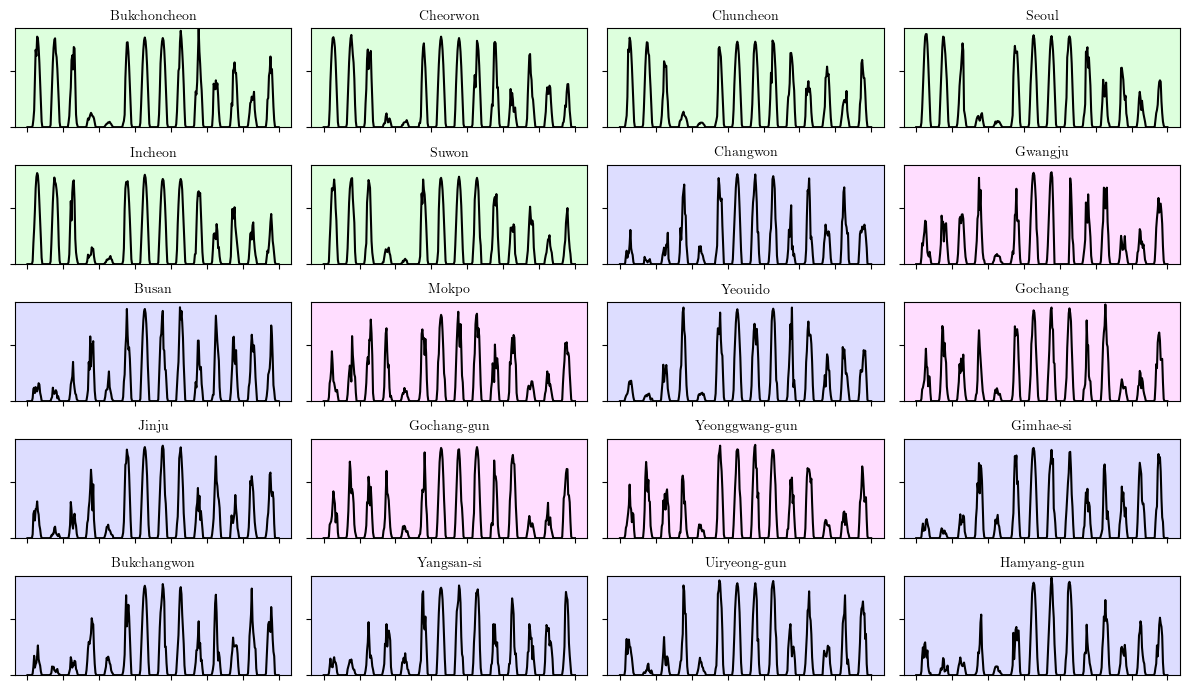

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 예제 데이터를 생성
date_range = pd.date_range(start="2022-09-01", end="2022-09-15", freq="H")

# 지역명을 생성 (예시: "Location 1", "Location 2", ..., "Location 44")
region_names = regions

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-09-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]

# 클러스터 3, 6, 7 정의
cluster_3 = {'Bukchoncheon', 'Cheorwon', 'Chuncheon', 'Seoul', 'Incheon', 'Suwon'}
cluster_6 = {'Changwon', 'Busan', 'Yeouido', 'Jinju', 'Gimhae-si', 'Bukchangwon', 
             'Yangsan-si', 'Uiryeong-gun', 'Hamyang-gun'}
cluster_7 = {'Gwangju', 'Mokpo', 'Gochang', 'Gochang-gun', 'Yeonggwang-gun'}

# 클러스터별 배경색 지정
cluster_colors = {
    "cluster_3": "#DDFFDD",  # 연한 초록색
    "cluster_6": "#DDDDFF",  # 연한 파란색
    "cluster_7": "#FFDDFF"   # 연한 분홍색
}

# 클러스터 3, 6, 7에 해당하는 지역 인덱스 찾기
selected_indices = [i for i, city in enumerate(region_names) if city in cluster_3 or city in cluster_6 or city in cluster_7]
selected_regions = [region_names[i] for i in selected_indices]

# 서브플롯 설정 (5행 4열)
fig, axes = plt.subplots(5, 4, figsize=(12, 7))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

# y축 범위 설정 (filtered_y 데이터의 전체 최소/최대 값 사용)
y_min, y_max = np.min(filtered_y), np.max(filtered_y)

# 각 지역에 대해 시계열 그래프 그리기
for i, region_idx in enumerate(selected_indices):  
    region_name = selected_regions[i]

    # 해당 지역이 속한 클러스터에 따라 배경색 설정
    if region_name in cluster_3:
        axes[i].patch.set_facecolor(cluster_colors["cluster_3"])
    elif region_name in cluster_6:
        axes[i].patch.set_facecolor(cluster_colors["cluster_6"])
    elif region_name in cluster_7:
        axes[i].patch.set_facecolor(cluster_colors["cluster_7"])

    # 시계열 데이터 플로팅
    axes[i].plot(filtered_t, filtered_y[:, region_idx], color='black')
    axes[i].set_title(region_name, fontsize=10)  # 글씨 크기 축소

    # y축 값을 고정
    axes[i].set_ylim(y_min, y_max)

    # x축, y축 라벨 생략
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])

# 그래프 레이아웃 조정
plt.tight_layout()

# 저장 경로 설정
save_path = "./figs/cluster_3_6_7_plot.pdf"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()


서울만 플랏!

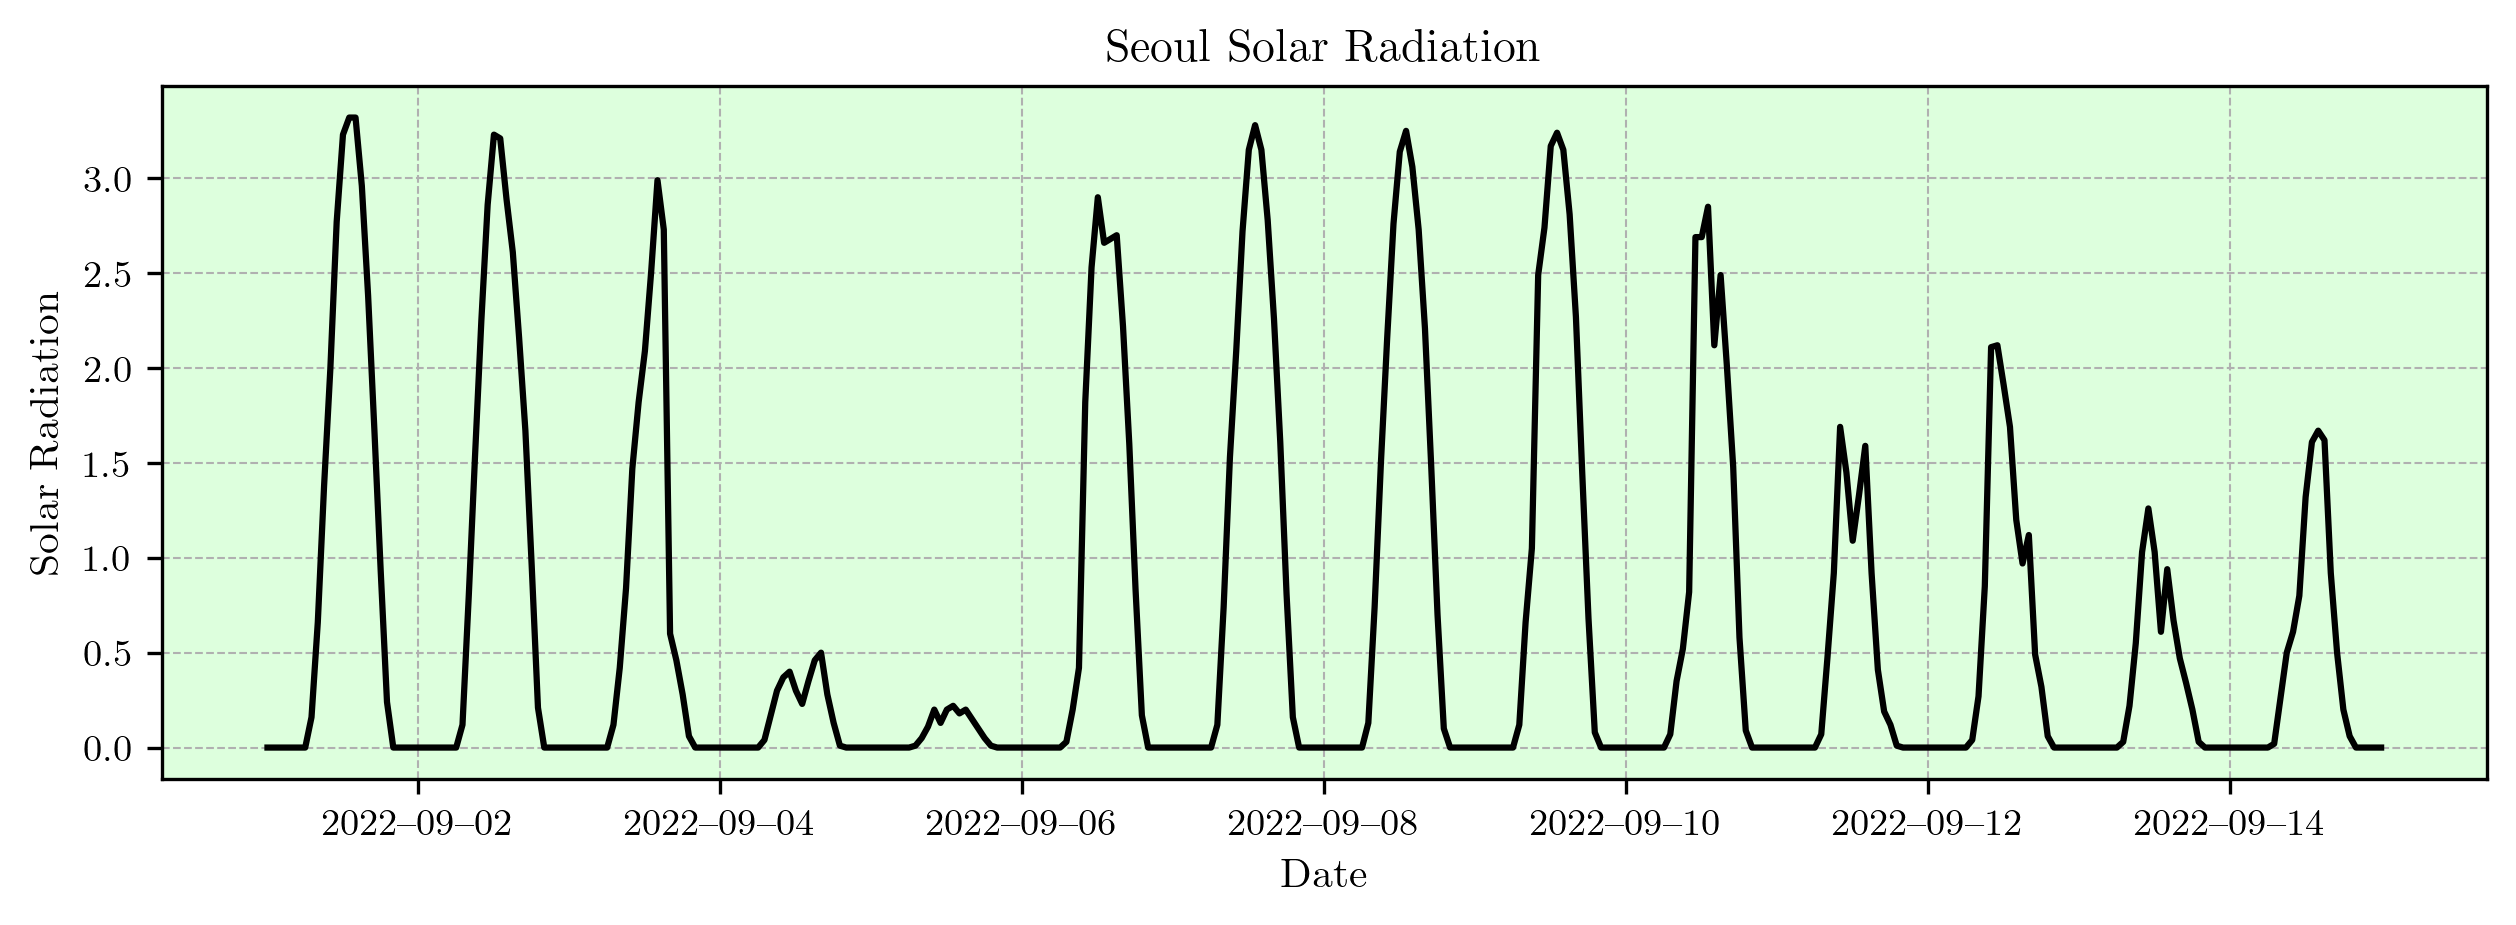

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# LaTeX 스타일 폰트 설정
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

# 예제 데이터를 생성
date_range = pd.date_range(start="2022-09-01", end="2022-09-15", freq="H")

# 지역명을 생성 (예시: "Location 1", "Location 2", ..., "Location 44")
region_names = regions

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-09-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]

# 서울만 선택
selected_region = "Seoul"
selected_index = region_names.index(selected_region)

# 클러스터별 배경색 지정
cluster_colors = {
    "cluster_3": "#DDFFDD",  # 연한 초록색
    "cluster_6": "#DDDDFF",  # 연한 파란색
    "cluster_7": "#FFDDFF"   # 연한 분홍색
}

# 서울이 속한 클러스터 찾기
seoul_cluster = None
if selected_region in {'Bukchoncheon', 'Cheorwon', 'Chuncheon', 'Seoul', 'Incheon', 'Suwon'}:
    seoul_cluster = "cluster_3"
elif selected_region in {'Changwon', 'Busan', 'Yeouido', 'Jinju', 'Gimhae-si', 'Bukchangwon', 'Yangsan-si', 'Uiryeong-gun', 'Hamyang-gun', 'Gwangyang-si'}:
    seoul_cluster = "cluster_6"
elif selected_region in {'Gwangju', 'Mokpo', 'Gochang', 'Gochang-gun', 'Yeonggwang-gun', 'Boseong-gun', 'Gangjin-gun'}:
    seoul_cluster = "cluster_7"

# 그래프 설정 (해상도 높게 저장)
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
if seoul_cluster:
    ax.set_facecolor(cluster_colors[seoul_cluster])  # 배경색 설정

# 시계열 데이터 플로팅
ax.plot(filtered_t, filtered_y[:, selected_index], color='black', linewidth=1.5)
ax.set_title(r"Seoul Solar Radiation", fontsize=11, fontweight='bold')  # 제목 조정

# x축, y축 라벨 변경 및 설정
ax.set_xlabel(r"Date", fontsize=10, fontweight='bold')
ax.set_ylabel(r"Solar Radiation", fontsize=10, fontweight='bold')

# x축 날짜 포맷 조정 (가장 짧은 en-dash 사용 YYYY–MM–DD.)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y–%m–%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # 2일 간격으로 표시
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)

# 그리드 추가
ax.grid(True, linestyle='--', linewidth=0.5)

# 저장 경로 설정
save_path = "./figs/seoul_solar_radiation.pdf"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

:::{.callout-note}
# Solar Radiation Prediction Using Spatio-Temporal Graph Neural Networks

## 1. Introduction
This report presents an analysis of solar radiation data, starting with an examination of solar radiation in Seoul, followed by an exploration of how spatial information can enhance forecasting accuracy. Two key visualizations are used:
1. **Seoul Solar Radiation Time Series**
2. **Clustered Solar Radiation Time Series Across Multiple Locations**

## 2. Solar Radiation in Seoul

The first figure (Seoul Solar Radiation Time Series) illustrates the variations in solar radiation in Seoul over time. This data exhibits typical characteristics of a time series, including daily cyclic patterns, which are crucial for understanding and predicting solar energy generation.

Understanding and forecasting solar radiation is fundamental for predicting solar power generation, as solar energy is directly proportional to radiation intensity. Reliable solar radiation forecasting enables better energy management, grid stability, and optimization of energy storage systems.

## 3. Traditional Time Series Prediction Approaches

Predicting solar radiation can be approached as a classical time series forecasting problem. Various time series models have been developed for such tasks, including:
- **Autoregressive Integrated Moving Average (ARIMA) [1]**
- **Long Short-Term Memory (LSTM) networks [2]**
- **Temporal Convolutional Networks (TCN) [3]**
- **Transformer-based time series models [4]**

The fundamental idea behind time series forecasting is that the value at time **t** depends on past observations. By analyzing historical patterns, these models attempt to predict future values.

## 4. Expanding Beyond a Single Location: Spatio-Temporal Analysis

While traditional time series models consider only historical values of a single location, real-world solar radiation data includes multiple locations with similar weather patterns. The second figure (Clustered Solar Radiation Time Series Across Multiple Locations) shows the time series patterns for multiple locations grouped by similarity.

- Locations in **Cluster 3** (e.g., Seoul, Incheon, Suwon) exhibit similar temporal patterns.
- Cluster-based grouping is done based on visually identified similarities in solar radiation trends.
- These regions share similar geographical and meteorological conditions.

To enhance the prediction of solar radiation for Seoul at time **t**, it is beneficial to incorporate not only Seoul’s past values but also those from similar regions (e.g., Cluster 3 locations).

## 5. Spatio-Temporal Graph Neural Networks (STGNN)

Instead of treating solar radiation as an independent time series for each location, our approach views it as **spatio-temporal data**—where each location is a node in a graph, connected to other relevant locations.

Spatio-temporal graph neural networks (STGNNs) effectively capture spatial dependencies between locations while modeling temporal dependencies. These models combine:
- **Graph Convolutional Networks (GCNs) [5]** for capturing spatial relationships
- **Recurrent or Transformer-based models [6]** for modeling temporal dependencies

## 6. Key Contributions of Our Approach

Our proposed method extends traditional STGNN-based solar radiation forecasting in the following ways:

1. **Learned Graph Structure**: Unlike most STGNN models that assume a pre-defined adjacency matrix, we infer the spatial relationships from data.
2. **Decomposed Signal Representation**: We express solar radiation as the product of:
   \[ \text{Solar Radiation} = \text{Periodic Component} \times \text{Amplitude-Modulated Term} \]
   This allows us to model different aspects of solar radiation separately.
3. **Ensemble Patch Transform (EPT)**: This decomposition is achieved via an ensemble patch transform, enabling us to:
   - Estimate periodic components using all available locations.
   - Estimate amplitude variations using only highly relevant locations.
4. **Greater Model Flexibility**: By decomposing the signal, we can integrate different types of predictive models for each component, leading to improved generalization.

## 7. Conclusion
This study proposes a novel **spatio-temporal deep learning approach** for solar radiation forecasting, combining time series analysis with spatial information. The approach provides:
- Better predictive performance by leveraging spatial dependencies
- A more interpretable model structure using decomposed signal components

Future work includes validating this approach on large-scale datasets and integrating additional meteorological variables.

## References
[1] Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). *Time Series Analysis: Forecasting and Control.*

[2] Hochreiter, S., & Schmidhuber, J. (1997). *Long Short-Term Memory.* Neural Computation.

[3] Bai, S., Kolter, J. Z., & Koltun, V. (2018). *An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling.*

[4] Vaswani, A., et al. (2017). *Attention Is All You Need.* NeurIPS.

[5] Kipf, T. N., & Welling, M. (2016). *Semi-Supervised Classification with Graph Convolutional Networks.*

[6] Wu, Z., et al. (2019). *Graph WaveNet for Deep Spatial-Temporal Graph Modeling.*

:::

:::{.callout-note}
# 태양 복사량 예측을 위한 시공간 그래프 신경망 (STGNN)

## 1. 서론
이 보고서는 태양 복사량 데이터를 분석하고, 공간 정보를 활용하여 예측 정확도를 향상시키는 방법을 설명합니다. 이를 위해 두 개의 주요 시각적 자료를 활용합니다.
1. **서울 태양 복사량 시계열 그래프**
2. **다양한 위치에서의 태양 복사량 시계열 그래프 (클러스터 기반 그룹화)**

## 2. 서울의 태양 복사량

첫 번째 그림(서울 태양 복사량 시계열 그래프)은 서울에서의 태양 복사량 변화를 시간에 따라 나타냅니다. 해당 데이터는 하루 단위 주기를 포함하는 전형적인 시계열 패턴을 보이며, 이는 태양광 발전량 예측에 있어 중요한 요소입니다.

태양광 발전량을 예측하기 위해서는 태양 복사량을 정확히 예측하는 것이 필수적입니다. 태양광 발전량은 태양 복사량에 직접적으로 비례하며, 정확한 예측은 에너지 관리, 전력망 안정성, 에너지 저장 시스템 최적화 등에 도움이 됩니다.

## 3. 전통적인 시계열 예측 기법

태양 복사량 예측은 전형적인 시계열 분석 문제로 간주될 수 있으며, 이를 해결하기 위해 다양한 방법이 존재합니다.
- **ARIMA (AutoRegressive Integrated Moving Average) [1]**
- **LSTM (Long Short-Term Memory) 신경망 [2]**
- **TCN (Temporal Convolutional Networks) [3]**
- **트랜스포머 기반 시계열 모델 [4]**

시계열 예측의 기본 원리는 **현재 시점 t의 값을 예측하기 위해 t 이전의 데이터를 활용**하는 것입니다.

## 4. 시공간 데이터로 확장

기존 시계열 분석은 단일 위치의 데이터만 고려하는 반면, 실제 태양 복사량 데이터는 다양한 지역에서 측정됩니다. 두 번째 그림(클러스터 기반 태양 복사량 시계열 그래프)은 여러 지역의 패턴을 그룹화하여 보여줍니다.

- **Cluster 3 (서울, 인천, 수원 등)**
- 클러스터 내 지역들은 유사한 시계열 패턴을 보이며, 동일한 기상 조건을 공유할 가능성이 큽니다.
- 따라서 서울의 태양 복사량 예측을 위해서는 서울뿐만 아니라 유사한 패턴을 가진 주변 지역의 정보도 함께 고려해야 합니다.

## 5. 시공간 그래프 신경망 (STGNN)

태양 복사량을 단순한 시계열 데이터로 보는 것이 아니라, **시공간(spatio-temporal) 데이터**로 해석할 수 있습니다. 즉, 각 위치를 그래프의 노드로 간주하고, 서로 유사한 지역을 연결하여 예측 정확도를 높일 수 있습니다.

STGNN은 다음과 같은 두 가지 요소를 결합하여 공간적, 시간적 관계를 동시에 모델링합니다.
- **그래프 합성곱 네트워크 (GCN) [5]**: 공간적 의존성 모델링
- **순환 신경망 또는 트랜스포머 기반 모델 [6]**: 시간적 패턴 학습

## 6. 연구의 주요 기여

본 연구에서는 기존 STGNN 모델을 확장하여 다음과 같은 차별점을 둡니다.

1. **학습된 그래프 구조**: 기존 연구에서는 노드 간 연결을 사전에 정의하지만, 우리는 데이터를 통해 공간적 관계를 학습합니다.
2. **신호 분해 기법 적용**: 태양 복사량을 다음과 같이 분해하여 각각의 요소를 분석합니다.
   \[ \text{태양 복사량} = \text{주기 성분} \times \text{진폭 변조 성분} \]
3. **Ensemble Patch Transform (EPT) 기법 활용**:
   - 주기 성분은 전체 노드 정보를 활용하여 추정
   - 진폭 변조 성분은 관련성이 높은 일부 노드만 활용하여 추정
4. **모델 조합의 유연성**: 원래 신호를 단순한 신호들의 곱으로 분해하여, 다양한 예측 모델을 효과적으로 결합할 수 있도록 합니다.

## 7. 결론

본 연구는 **시계열 분석과 공간 정보를 결합**하여 태양 복사량을 더욱 효과적으로 예측하는 접근법을 제시합니다. 이를 통해:
- **공간적 의존성을 활용하여 예측 성능을 향상**
- **신호 분해를 통해 모델의 해석 가능성을 높임**

향후 연구에서는 대규모 데이터셋을 활용한 검증 및 기상 조건을 추가 변수로 고려하는 방안을 탐색할 예정입니다.

## 참고 문헌

[1] Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). *Time Series Analysis: Forecasting and Control.*

[2] Hochreiter, S., & Schmidhuber, J. (1997). *Long Short-Term Memory.* Neural Computation.

[3] Bai, S., Kolter, J. Z., & Koltun, V. (2018). *An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling.*

[4] Vaswani, A., et al. (2017). *Attention Is All You Need.* NeurIPS.

[5] Kipf, T. N., & Welling, M. (2016). *Semi-Supervised Classification with Graph Convolutional Networks.*

[6] Wu, Z., et al. (2019). *Graph WaveNet for Deep Spatial-Temporal Graph Modeling.*

:::